### Grupo 4
### Miguel Egido Morales, Ana Robledano Abasolo, Alfredo Robledano Abasolo
# P3 AA Redes de Neuronas Convolucionales

In [1]:
from time import perf_counter
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds, ds_info = tfds.load('cifar100',
               shuffle_files=True,
               with_info=True)
classes = ds_info.features['label'].names
superclasses = ds_info.features['coarse_label'].names

In [3]:
ds_train = ds['train'].map(lambda x: {'image': x['image'],
                                      'label': x['label'],
                                      'coarse_label': x['coarse_label']})
validation_size = int(0.2 * ds_info.splits['train'].num_examples)

ds_validation = ds_train.take(validation_size)
ds_train = ds_train.skip(validation_size)

In [4]:
len(ds_train), len(ds_validation)

(40000, 10000)

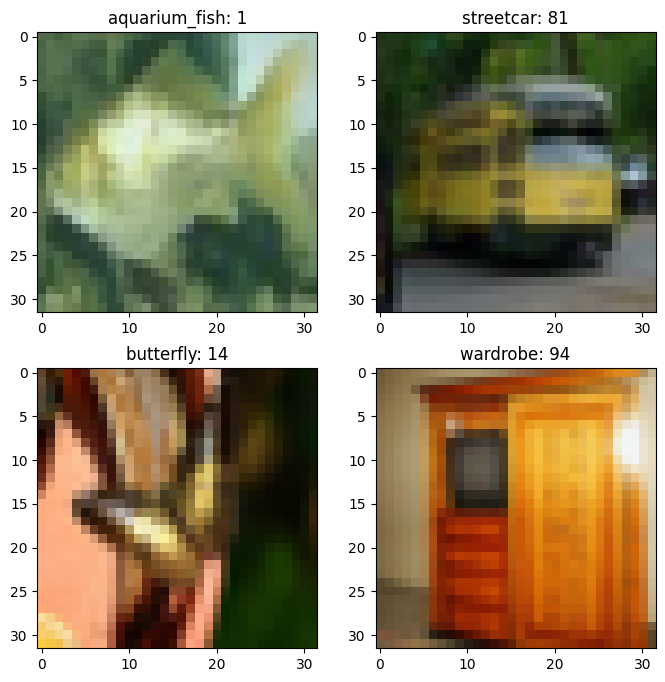

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
for i, x in enumerate(ds_train.take(4)):
  image, label, coarse_label = x.values()
  plt.subplot(2, 2, i+1)
  plt.imshow(image)
  plt.title(f"{classes[label]}: {label}")

In [ ]:
print(ds_train.take(1))